In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [2]:
df = pd.read_csv("Lemonade2016.csv", parse_dates=["Date"])
df.head(10)

,Date,Location,Lemon,Orange,Temperature,Leaflets,Price
0,2016-07-01,Park,97,67,70,90.0,0.25
1,2016-07-02,Park,98,67,72,90.0,0.25
2,2016-07-03,Park,110,77,71,104.0,0.25
3,2016-07-04,Beach,134,99,76,98.0,0.25
4,2016-07-05,Beach,159,118,78,135.0,0.25
5,2016-07-06,Beach,103,69,82,90.0,0.25
6,2016-07-06,Beach,103,69,82,90.0,0.25
7,2016-07-07,Beach,143,101,81,135.0,0.25
8,NaT,Beach,123,86,82,113.0,0.25
9,2016-07-09,Beach,134,95,80,126.0,0.25


In [3]:
df.drop_duplicates(inplace=True)
df.head(10)

,Date,Location,Lemon,Orange,Temperature,Leaflets,Price
0,2016-07-01,Park,97,67,70,90.0,0.25
1,2016-07-02,Park,98,67,72,90.0,0.25
2,2016-07-03,Park,110,77,71,104.0,0.25
3,2016-07-04,Beach,134,99,76,98.0,0.25
4,2016-07-05,Beach,159,118,78,135.0,0.25
5,2016-07-06,Beach,103,69,82,90.0,0.25
7,2016-07-07,Beach,143,101,81,135.0,0.25
8,NaT,Beach,123,86,82,113.0,0.25
9,2016-07-09,Beach,134,95,80,126.0,0.25
10,2016-07-10,Beach,140,98,82,131.0,0.25


Interpolation for datetime types doesn't seem to be working.

In [4]:
df["Date"].interpolate().head(10)

0    2016-07-01
1    2016-07-02
2    2016-07-03
3    2016-07-04
4    2016-07-05
5    2016-07-06
7    2016-07-07
8           NaT
9    2016-07-09
10   2016-07-10
Name: Date, dtype: datetime64[ns]

This doesn't work either

In [5]:
s = df.loc[:, "Date"]
print(type(s))
s.interpolate().head(10)

<class 'pandas.core.series.Series'>


0    2016-07-01
1    2016-07-02
2    2016-07-03
3    2016-07-04
4    2016-07-05
5    2016-07-06
7    2016-07-07
8           NaT
9    2016-07-09
10   2016-07-10
Name: Date, dtype: datetime64[ns]

Currently, this is the best info found for filling missing dates.

But, it says support was added in 0.18

https://github.com/rinoc/pandas/commit/e77e4c8566db68c0ec144f9aeb01dc5225c971d6


In [6]:
df_time = pd.to_numeric(df["Date"])
df_time.loc[df_time < 0] = np.nan
df["Date"] = pd.to_datetime(df_time.interpolate())
df.head(10)

,Date,Location,Lemon,Orange,Temperature,Leaflets,Price
0,2016-07-01,Park,97,67,70,90.0,0.25
1,2016-07-02,Park,98,67,72,90.0,0.25
2,2016-07-03,Park,110,77,71,104.0,0.25
3,2016-07-04,Beach,134,99,76,98.0,0.25
4,2016-07-05,Beach,159,118,78,135.0,0.25
5,2016-07-06,Beach,103,69,82,90.0,0.25
7,2016-07-07,Beach,143,101,81,135.0,0.25
8,2016-07-08,Beach,123,86,82,113.0,0.25
9,2016-07-09,Beach,134,95,80,126.0,0.25
10,2016-07-10,Beach,140,98,82,131.0,0.25


In [7]:
df["Sales"] = df["Lemon"] + df["Orange"]
df["Revenue"] = df["Sales"] * df["Price"]
df.head()

,Date,Location,Lemon,Orange,Temperature,Leaflets,Price,Sales,Revenue
0,2016-07-01,Park,97,67,70,90.0,0.25,164,41.00
1,2016-07-02,Park,98,67,72,90.0,0.25,165,41.25
2,2016-07-03,Park,110,77,71,104.0,0.25,187,46.75
3,2016-07-04,Beach,134,99,76,98.0,0.25,233,58.25
4,2016-07-05,Beach,159,118,78,135.0,0.25,277,69.25


In [8]:
def top_percent_color(s, percent=10, color="Salmon"):
    """
    Takes a series and returns a string with
    the css property `'color: color'` for values in
    top percent.
    """
    quantile = s >= s.quantile((100 - percent) / 100)
    return ['background-color: {}'.format(color) if v else '' for v in quantile]


def bottom_percent_color(s, percent=10, color="PaleGreen"):
    """
    Takes a series and returns a string with
    the css property `'color: color'` for values in
    bottom percent.
    """
    quantile = s <= s.quantile(percent / 100)
    return ['background-color: {}'.format(color) if v else '' for v in quantile]


style_temps = (df.style
               .apply(top_percent_color, subset=["Temperature"])
               .apply(bottom_percent_color, subset=["Temperature"]))
style_temps

,Date,Location,Lemon,Orange,Temperature,Leaflets,Price,Sales,Revenue
0,2016-07-01 00:00:00,Park,97,67,70,90,0.25,164,41
1,2016-07-02 00:00:00,Park,98,67,72,90,0.25,165,41.25
2,2016-07-03 00:00:00,Park,110,77,71,104,0.25,187,46.75
3,2016-07-04 00:00:00,Beach,134,99,76,98,0.25,233,58.25
4,2016-07-05 00:00:00,Beach,159,118,78,135,0.25,277,69.25
5,2016-07-06 00:00:00,Beach,103,69,82,90,0.25,172,43
7,2016-07-07 00:00:00,Beach,143,101,81,135,0.25,244,61
8,2016-07-08 00:00:00,Beach,123,86,82,113,0.25,209,52.25
9,2016-07-09 00:00:00,Beach,134,95,80,126,0.25,229,57.25
10,2016-07-10 00:00:00,Beach,140,98,82,131,0.25,238,59.5


In [9]:
max_temp = df["Temperature"].max()
min_temp = df["Temperature"].min()
print(
    '''Max temp: {}
Min temp: {}'''
    .format(max_temp, min_temp))

Max temp: 84
Min temp: 70


In [10]:
df.columns

Index(['Date', 'Location', 'Lemon', 'Orange', 'Temperature', 'Leaflets',
       'Price', 'Sales', 'Revenue'],
      dtype='object')

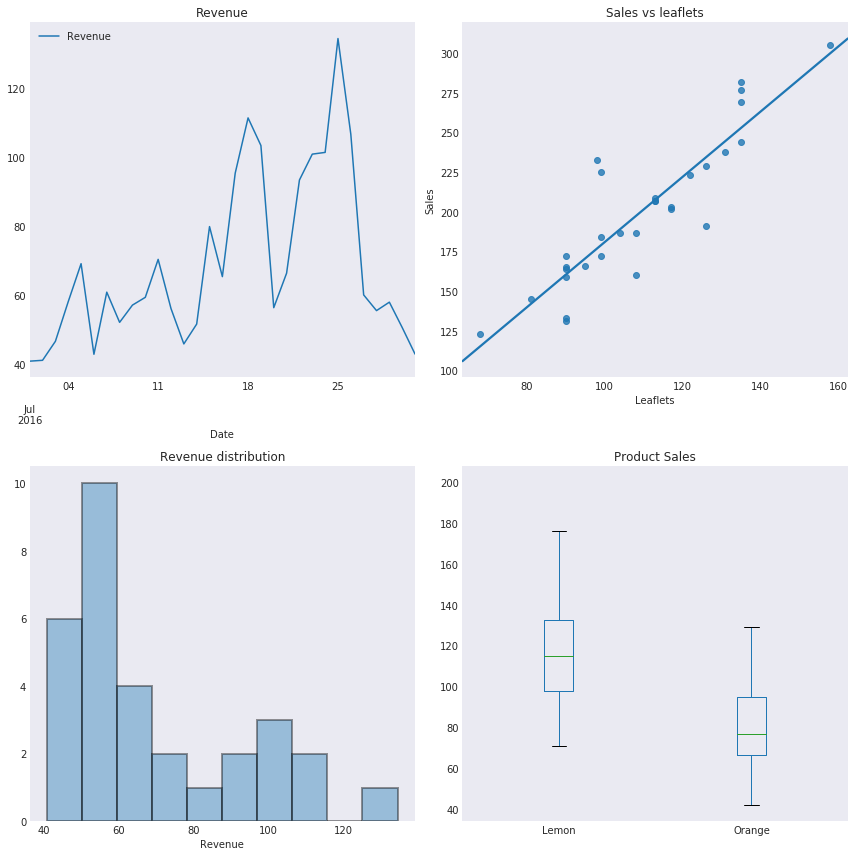

In [11]:
sns.set_style("dark")
fig, ((revenues, leaflets), (revenue_dist, lemon_orange)
      ) = plt.subplots(nrows=2, ncols=2)
fig.set_size_inches(12, 12)

df.plot.line(x="Date",
             y="Revenue",
             title="Revenue",
             ax=revenues
             )

sns.regplot(x="Leaflets",
            y="Sales",
            ci=None,
            data=df,
            ax=leaflets,
            )
leaflets.set_title("Sales vs leaflets")

sns.distplot(df["Revenue"],
             bins=10,
             kde=False,
             hist_kws=dict(edgecolor="k",
                           linewidth=2),
             ax=revenue_dist,
             )
revenue_dist.set_title("Revenue distribution")

(df[["Lemon", "Orange"]]
 .plot.box(ax=lemon_orange,
           title="Product Sales")
 )

plt.tight_layout()
plt.savefig("Revenue.png",
            dpi=300)